In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the Dataset

In [3]:
dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values

## Splitting the Dataset into the Training and Test Set

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the K-NN Model on the training set

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

## Predicting a new Result

In [16]:
print(classifier.predict([[30,87000]]))

[1]


## Predicting the Test Set Results

In [19]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),
                     y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]]


## Confusion Matrix & Accuracy Score

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[48  4]
 [ 3 25]]


0.9125

## Visualising

### Training

Prediction process starting...
Prediction process completed.


C:\Users\Baris\AppData\Local\Temp\ipykernel_20560\1578998538.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


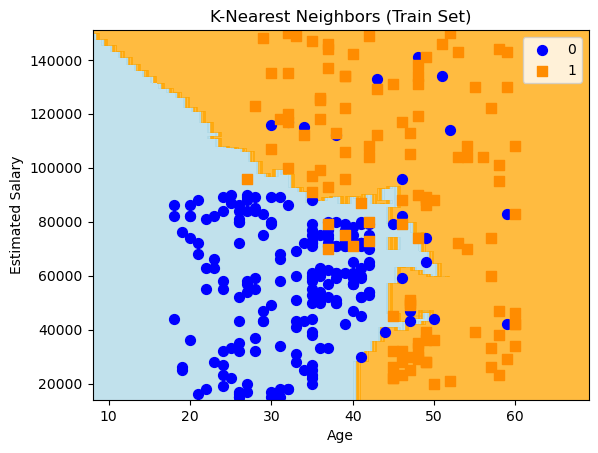

In [26]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
# Create a meshgrid for the train data
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),  # Wider step for faster computation
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=1)  # Wider step for faster computation
)

print("Prediction process starting...")
# Predict the results for the grid points
predictions = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T))
print("Prediction process completed.")

# Reshape predictions to match the meshgrid
Z = predictions.reshape(X1.shape)

# Plot the decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(("lightblue", "orange")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Add scatter points for the actual data
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(("blue", "darkorange"))(i), label=j, s=50,
                marker="o" if j == 0 else "s")

# Add plot titles and labels
plt.title("K-Nearest Neighbors (Train Set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

# Save and display the plot
plt.savefig("train.png")
plt.show()

### Test

Prediction process starting...
Prediction process completed.


C:\Users\Baris\AppData\Local\Temp\ipykernel_20560\2890020943.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


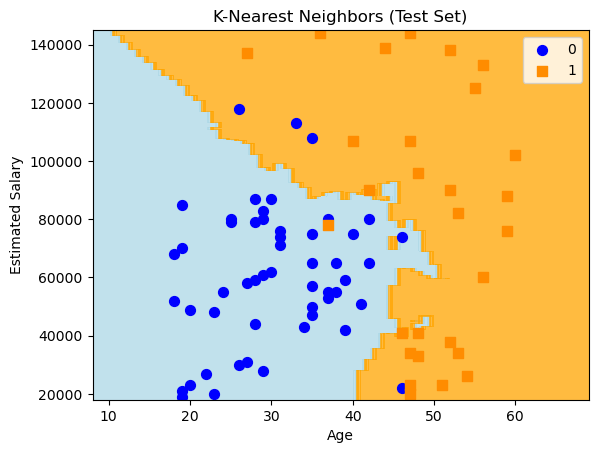

In [29]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
# Create a meshgrid for the test data
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),  # Wider step for faster computation
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=1)  # Wider step for faster computation
)

print("Prediction process starting...")
# Predict the results for the grid points
predictions = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T))
print("Prediction process completed.")

# Reshape predictions to match the meshgrid
Z = predictions.reshape(X1.shape)

# Plot the decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(("lightblue", "orange")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Add scatter points for the actual data
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(("blue", "darkorange"))(i), label=j, s=50,
                marker="o" if j == 0 else "s")

# Add plot titles and labels
plt.title("K-Nearest Neighbors (Test Set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()

# Save and display the plot
plt.savefig("test.png")
plt.show()